In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("DataSet/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split
# x is data frame without target variable
x = data.drop(['median_house_value'], axis = 1)
# y is target variable
y = data['median_house_value']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
train_data = x_train.join(y_train)

In [11]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
45,-122.26,37.83,52.0,1656.0,420.0,718.0,382.0,2.6768,NEAR BAY,182300.0
4323,-118.35,34.09,42.0,2210.0,643.0,1228.0,605.0,2.5982,<1H OCEAN,315800.0
11430,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541,<1H OCEAN,281500.0
8833,-118.37,34.09,31.0,6348.0,1827.0,2559.0,1755.0,3.2818,<1H OCEAN,225000.0
10343,-117.66,33.61,16.0,2022.0,254.0,789.0,270.0,8.4112,<1H OCEAN,286900.0
...,...,...,...,...,...,...,...,...,...,...
6280,-117.92,34.03,35.0,1341.0,233.0,898.0,216.0,4.1118,<1H OCEAN,157300.0
14955,-116.97,32.75,28.0,3519.0,583.0,1720.0,590.0,4.7973,<1H OCEAN,186900.0
13307,-117.62,34.08,24.0,2801.0,554.0,2064.0,529.0,4.4946,INLAND,136000.0
16408,-121.23,37.95,32.0,2081.0,472.0,1342.0,411.0,2.7958,INLAND,59000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

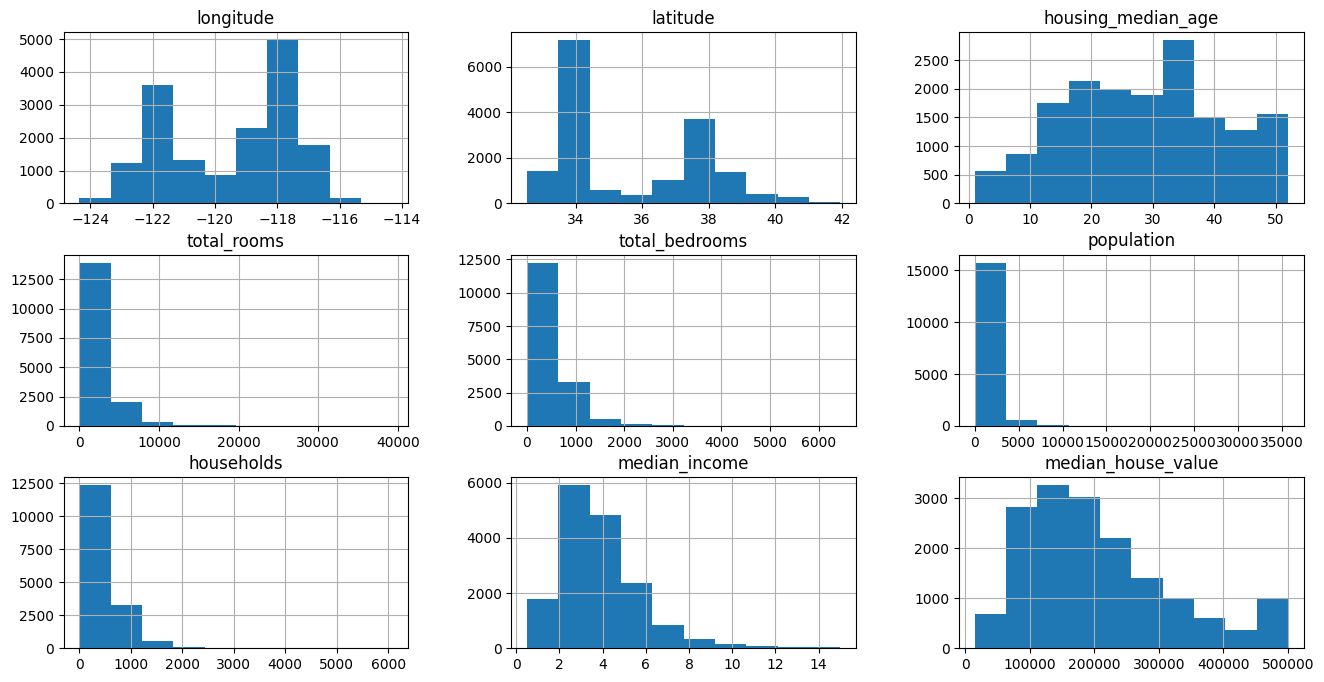

In [12]:
train_data.hist(figsize=(16,8))

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
45,-122.26,37.83,52.0,1656.0,420.0,718.0,382.0,2.6768,NEAR BAY,182300.0
4323,-118.35,34.09,42.0,2210.0,643.0,1228.0,605.0,2.5982,<1H OCEAN,315800.0
11430,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541,<1H OCEAN,281500.0
8833,-118.37,34.09,31.0,6348.0,1827.0,2559.0,1755.0,3.2818,<1H OCEAN,225000.0
10343,-117.66,33.61,16.0,2022.0,254.0,789.0,270.0,8.4112,<1H OCEAN,286900.0
...,...,...,...,...,...,...,...,...,...,...
6280,-117.92,34.03,35.0,1341.0,233.0,898.0,216.0,4.1118,<1H OCEAN,157300.0
14955,-116.97,32.75,28.0,3519.0,583.0,1720.0,590.0,4.7973,<1H OCEAN,186900.0
13307,-117.62,34.08,24.0,2801.0,554.0,2064.0,529.0,4.4946,INLAND,136000.0
16408,-121.23,37.95,32.0,2081.0,472.0,1342.0,411.0,2.7958,INLAND,59000.0


In [14]:
train_data.corr(numeric_only = True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924914,-0.105288,0.040004,0.065539,0.096378,0.052313,-0.016387,-0.044530
latitude,-0.924914,1.000000,0.009970,-0.031868,-0.063964,-0.105808,-0.067649,-0.078647,-0.145643
housing_median_age,-0.105288,0.009970,1.000000,-0.359111,-0.318188,-0.292473,-0.300859,-0.119040,0.107294
total_rooms,0.040004,-0.031868,-0.359111,1.000000,0.930986,0.856229,0.920185,0.189540,0.127754
total_bedrooms,0.065539,-0.063964,-0.318188,0.930986,1.000000,0.876568,0.980789,-0.015209,0.045168
population,0.096378,-0.105808,-0.292473,0.856229,0.876568,1.000000,0.904871,-0.005188,-0.029815
households,0.052313,-0.067649,-0.300859,0.920185,0.980789,0.904871,1.000000,0.005095,0.059956
median_income,-0.016387,-0.078647,-0.119040,0.189540,-0.015209,-0.005188,0.005095,1.000000,0.690917
median_house_value,-0.044530,-0.145643,0.107294,0.127754,0.045168,-0.029815,0.059956,0.690917,1.000000


<Axes: >

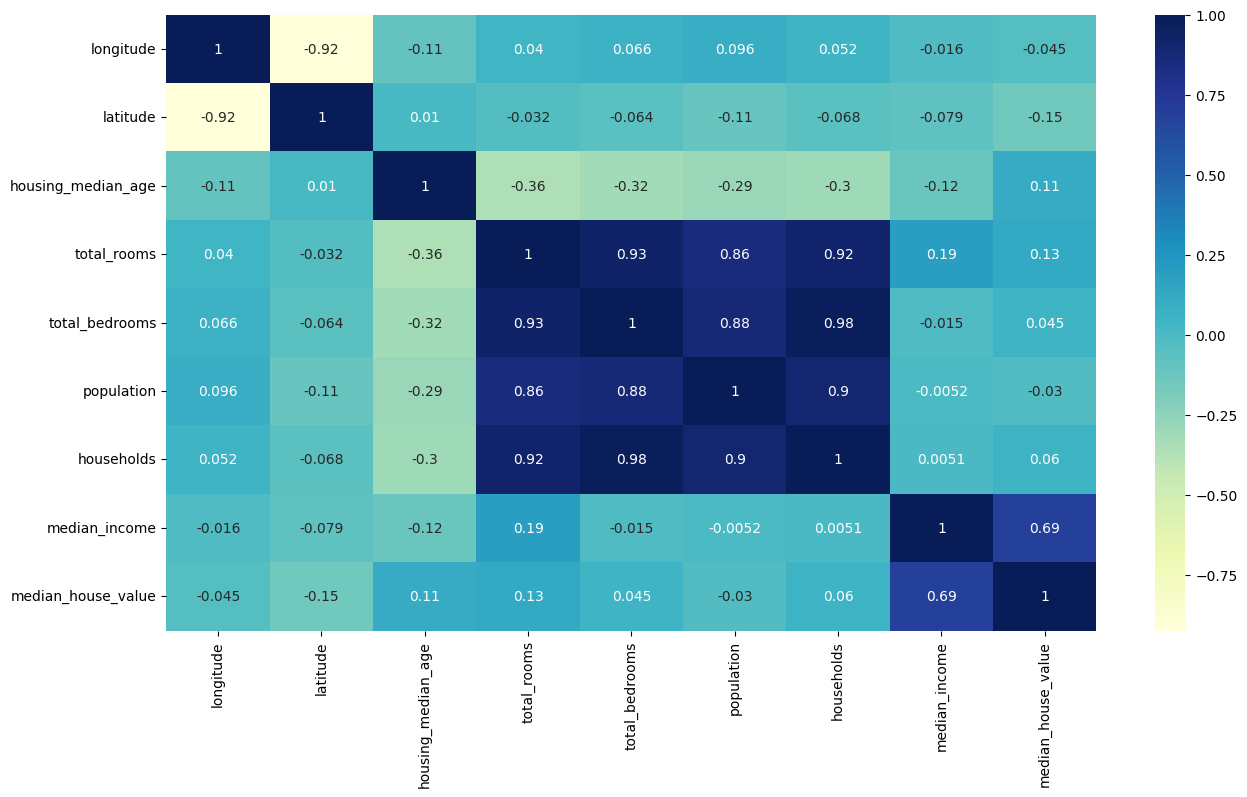

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True, cmap= "YlGnBu")

In [17]:
train_data['total_rooms'] = np.log(train_data['total_rooms']+1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+1)
train_data['population'] = np.log(train_data['population']+1)
train_data['households'] = np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

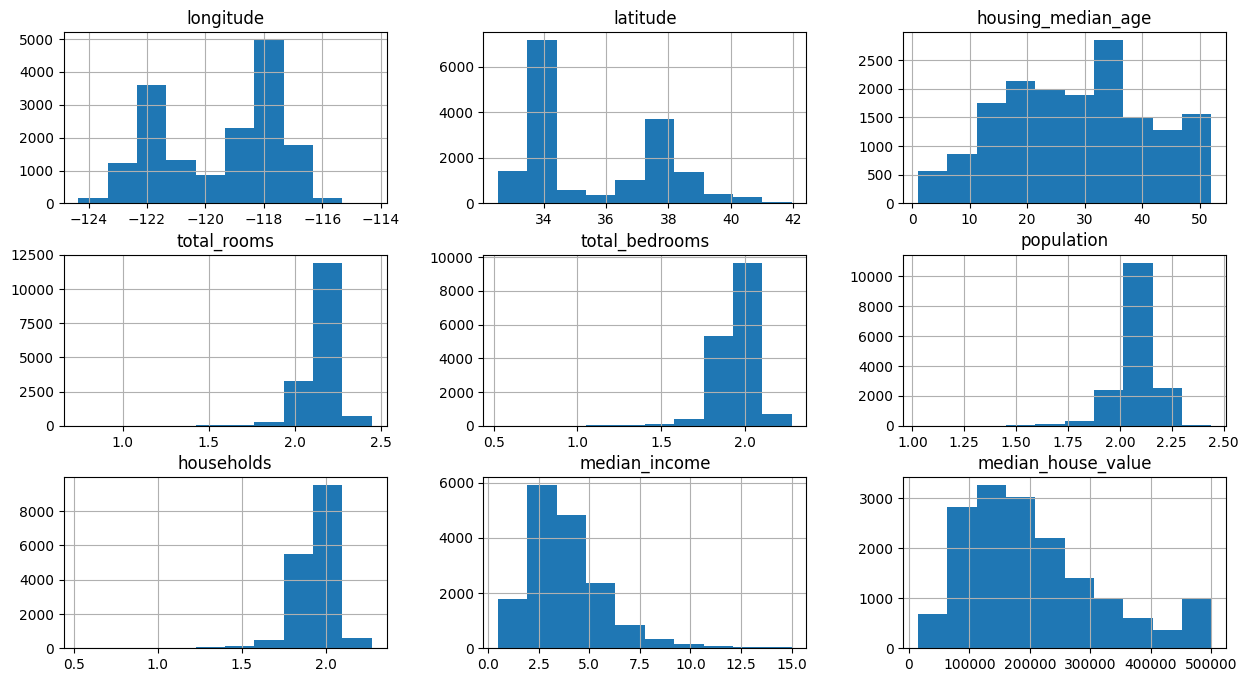

In [19]:
train_data.hist(figsize=(15,8))